x len= 50
x= [-20.         -18.97959184 -17.95918367 -16.93877551 -15.91836735
 -14.89795918 -13.87755102 -12.85714286 -11.83673469 -10.81632653
  -9.79591837  -8.7755102   -7.75510204  -6.73469388  -5.71428571
  -4.69387755  -3.67346939  -2.65306122  -1.63265306  -0.6122449
   0.40816327   1.42857143   2.44897959   3.46938776   4.48979592
   5.51020408   6.53061224   7.55102041   8.57142857   9.59183673
  10.6122449   11.63265306  12.65306122  13.67346939  14.69387755
  15.71428571  16.73469388  17.75510204  18.7755102   19.79591837
  20.81632653  21.83673469  22.85714286  23.87755102  24.89795918
  25.91836735  26.93877551  27.95918367  28.97959184  30.        ]
y len= 50
y= [-20.         -18.7755102  -17.55102041 -16.32653061 -15.10204082
 -13.87755102 -12.65306122 -11.42857143 -10.20408163  -8.97959184
  -7.75510204  -6.53061224  -5.30612245  -4.08163265  -2.85714286
  -1.63265306  -0.40816327   0.81632653   2.04081633   3.26530612
   4.48979592   5.71428571   6.93877551   8.163265

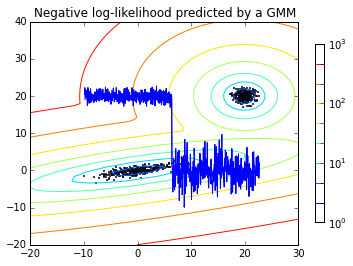

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture
from matplotlib.pyplot import *
import numpy as np

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)


# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

# fit a Gaussian Mixture Model with two components
clf = mixture.GMM(n_components=2, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
print "x len=",len(x)
print "x=",x
print "y len=",len(y)
print "y=",y

X, Y = np.meshgrid(x, y)
print "X.shape=",X.shape
print "Y.shape=",Y.shape
print "X=",X[:6]
print "Y=",Y[:6]
print "X.ravel.shape=",X.ravel().shape
print "Y.ravel.shape=",Y.ravel().shape
XX = np.array([X.ravel(), Y.ravel()]).T
print "XX.shape=",XX.shape
print XX[:3]
Z = -clf.score_samples(XX)[0]

Z = Z.reshape(X.shape)
print "Z.shape=",Z.shape
print Z[:3]

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')


plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

x = np.linspace(np.min(X_train), np.max(X_train), len(X_train))

# Plot the data to which the GMM is being fitted
plt.plot(x, X_train, color='blue')
#plt.show()